In [1]:
import numpy as np
import pandas as pd

In [28]:
X_train_scaled = pd.read_pickle("X_train_scaled.pkl")
X_test_scaled = pd.read_pickle("X_test_scaled.pkl")
y_tr = pd.read_pickle("y_tr.pkl")

X_train_scaled['y'] = y_tr

In [3]:
X_train_scaled.head().T

,0,1,2,3,4
mean,1.424140,0.805716,1.511155,1.494934,1.520242
std,-0.170214,0.004734,0.049252,0.043950,0.088495
max,-0.218194,0.063936,-0.086289,0.122560,-0.067969
min,0.193218,-0.018037,0.163039,-0.187796,0.087590
mean_change_abs,-1.326420,0.002747,-0.218781,0.002747,-0.108017
mean_change_rate,0.298912,-0.026067,0.000767,0.451046,0.359558
abs_max,-0.222567,0.036797,-0.101306,0.097427,-0.084464
abs_min,0.000000,0.000000,0.000000,0.000000,0.000000
std_first_50000,0.052067,0.153858,0.004241,0.020852,-0.093104
std_last_50000,-0.285579,-0.076987,0.277885,-0.058805,0.174161


In [6]:
n = len(X_train_scaled); n

4194

In [5]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [29]:
train = X_train_scaled
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in ['y']]

In [32]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['y'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='mae')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("MAE (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [34]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, train, predictors)

XGBoostError: b'[17:08:49] /workspace/src/objective/regression_obj.cu:102: label must be in [0,1] for logistic regression\n\nStack trace returned 10 entries:\n[bt] (0) /opt/anaconda3/xgboost/libxgboost.so(dmlc::StackTrace()+0x3d) [0x7fde2ead75cd]\n[bt] (1) /opt/anaconda3/xgboost/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x18) [0x7fde2ead79c8]\n[bt] (2) /opt/anaconda3/xgboost/libxgboost.so(xgboost::obj::RegLossObj<xgboost::obj::LogisticClassification>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0xa09) [0x7fde2eccdbc9]\n[bt] (3) /opt/anaconda3/xgboost/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x362) [0x7fde2eb4e1e2]\n[bt] (4) /opt/anaconda3/xgboost/libxgboost.so(XGBoosterUpdateOneIter+0x35) [0x7fde2eacfab5]\n[bt] (5) /opt/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7fde6c167ec0]\n[bt] (6) /opt/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7fde6c16787d]\n[bt] (7) /opt/anaconda3/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7fde6c37df3e]\n[bt] (8) /opt/anaconda3/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(+0x13974) [0x7fde6c37e974]\n[bt] (9) /opt/anaconda3/bin/python(_PyObject_FastCallKeywords+0x49b) [0x55d32ccad46b]\n\n'

In [27]:
train.columns

Index(['mean', 'std', 'max', 'min', 'mean_change_abs', 'mean_change_rate',
       'abs_max', 'abs_min', 'std_first_50000', 'std_last_50000',
       ...
       'std_roll_mean_1000', 'max_roll_mean_1000', 'min_roll_mean_1000',
       'q01_roll_mean_1000', 'q05_roll_mean_1000', 'q95_roll_mean_1000',
       'q99_roll_mean_1000', 'av_change_abs_roll_mean_1000',
       'av_change_rate_roll_mean_1000', 'abs_max_roll_mean_1000'],
      dtype='object', length=138)

## Prepare dataset

In [192]:
from catboost import CatBoostRegressor

In [240]:
cb_model = CatBoostRegressor(iterations=100,
                             learning_rate=0.08,
                             depth=12,
                             eval_metric='MAE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100)

In [241]:
len(X_train_scaled)

4194

In [242]:
X_tr=X_train_scaled[:3000].drop(['y'],axis=1)
X_val=X_train_scaled[3000:].drop(['y'],axis=1)
y_tr=X_train_scaled['y'].iloc[:3000]
y_val=X_train_scaled['y'].iloc[3000:]


In [243]:
cb_model.fit(X_tr, y_tr,
             eval_set=(X_val,y_val),
             use_best_model=True)

0:	learn: 5.3561117	test: 5.0549559	best: 5.0549559 (0)	total: 6.19s	remaining: 10m 12s
1:	learn: 4.9734536	test: 4.6939216	best: 4.6939216 (1)	total: 13.3s	remaining: 10m 53s
2:	learn: 4.6288549	test: 4.3644254	best: 4.3644254 (2)	total: 20.4s	remaining: 11m
3:	learn: 4.3175935	test: 4.0636859	best: 4.0636859 (3)	total: 27.5s	remaining: 11m
4:	learn: 4.0398967	test: 3.8002548	best: 3.8002548 (4)	total: 34.4s	remaining: 10m 52s
5:	learn: 3.7917639	test: 3.5701417	best: 3.5701417 (5)	total: 41.3s	remaining: 10m 47s
6:	learn: 3.5714198	test: 3.3698595	best: 3.3698595 (6)	total: 48.4s	remaining: 10m 42s
7:	learn: 3.3730418	test: 3.1777032	best: 3.1777032 (7)	total: 55.2s	remaining: 10m 35s
8:	learn: 3.1926733	test: 3.0030507	best: 3.0030507 (8)	total: 1m 2s	remaining: 10m 30s
9:	learn: 3.0308888	test: 2.8505735	best: 2.8505735 (9)	total: 1m 9s	remaining: 10m 25s
10:	learn: 2.8882700	test: 2.7138629	best: 2.7138629 (10)	total: 1m 16s	remaining: 10m 18s
11:	learn: 2.7629719	test: 2.5845545	

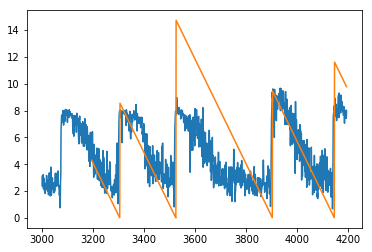

In [244]:
preds = cb_model.predict(X_train_scaled[3000:])

import matplotlib.pyplot as plt
#plt.plot(range(3194,4194),preds)
plt.plot(range(3000,4194),preds)
plt.plot(train_df.iloc[3194:4194,138])

In [246]:
submission = pd.read_csv('sample_submission.csv', index_col='seg_id')
submission.head()

,time_to_failure
seg_id,
seg_00030f,0
seg_0012b5,0
seg_00184e,0
seg_003339,0
seg_0042cc,0


In [249]:
sub_preds = cb_model.predict(X_test_scaled)
len(sub_preds)

2624

In [252]:
submission['time_to_failure'] = sub_preds
# submission['time_to_failure'] = prediction_lgb_stack
print(submission.head())
submission.to_csv('submission_v1.csv')

            time_to_failure
seg_id                     
seg_00030f         3.789258
seg_0012b5         3.748225
seg_00184e         4.201277
seg_003339         7.729346
seg_0042cc         5.678347
